In [1]:
import pandas as pd
data=pd.read_excel("D:\Imarti Excel files\Height and Weight.xlsx")
data.head()

,AGE,GENDER,HEIGHT,WEIGHT
0,18 to 29,Male,182.6,79
1,NaN,Female,169.6,67
2,30 to 39,Male,183.9,85
3,NaN,Female,169.7,67
4,40 to 49,Male,180.2,85


In [2]:
data.describe()

,HEIGHT,WEIGHT
count,12.000000,12.000000
mean,173.450000,74.166667
std,7.117137,7.505553
min,164.000000,66.000000
25%,167.800000,67.000000
50%,172.500000,72.500000
75%,179.825000,80.000000
max,183.900000,85.000000


array([[<AxesSubplot:title={'center':'HEIGHT'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>]], dtype=object)

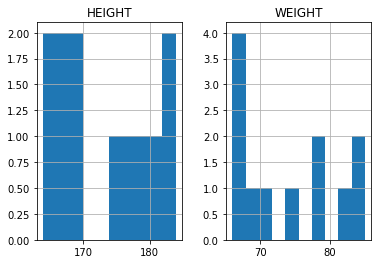

In [3]:
data.hist()

In [4]:
from scipy import stats
stats.shapiro(data.HEIGHT)

ShapiroResult(statistic=0.9180505275726318, pvalue=0.2701774537563324)

In [5]:
from scipy import stats
stats.shapiro(data.WEIGHT)

ShapiroResult(statistic=0.8582820296287537, pvalue=0.046526357531547546)

<AxesSubplot:>

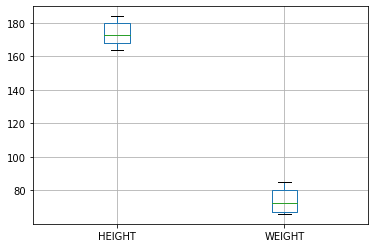

In [6]:
data.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x198e22256d0>,
 'caps': [<matplotlib.lines.Line2D at 0x198e2225df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x198e2225340>],
 'medians': [<matplotlib.lines.Line2D at 0x198e2232550>],
 'fliers': [<matplotlib.lines.Line2D at 0x198e22328e0>],
 'means': []}

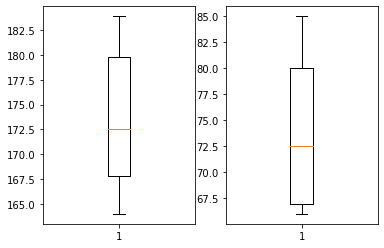

In [7]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.boxplot(data.HEIGHT)
plt.subplot(1,2,2)
plt.boxplot(data.WEIGHT)

In [9]:
train=data.iloc[:6]

In [10]:
data.iloc[:6]

,AGE,GENDER,HEIGHT,WEIGHT
0,18 to 29,Male,182.6,79
1,NaN,Female,169.6,67
2,30 to 39,Male,183.9,85
3,NaN,Female,169.7,67
4,40 to 49,Male,180.2,85
5,NaN,Female,167.9,71


In [11]:
test=data.iloc[6:]

In [12]:
data.iloc[6:]

,AGE,GENDER,HEIGHT,WEIGHT
6,50 to 59,Male,179.7,83
7,NaN,Female,167.5,68
8,60 to 69,Male,176.6,78
9,NaN,Female,164.4,66
10,Above 70,Male,175.3,74
11,NaN,Female,164.0,67


<AxesSubplot:xlabel='HEIGHT', ylabel='WEIGHT'>

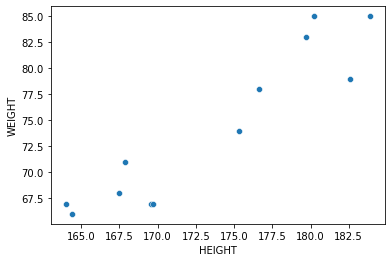

In [13]:
import seaborn as sns
sns.scatterplot(data=data,x="HEIGHT",y="WEIGHT")

In [14]:
from scipy import stats   
stats.pearsonr(data.HEIGHT,data.WEIGHT)

(0.9324393139872098, 9.889628181626118e-06)

In [15]:
import statsmodels.api as sm

In [17]:
train_x=train.HEIGHT
train_y=train.WEIGHT
train_x=sm.add_constant(train_x)

In [31]:
 model=sm.OLS(train_y,train_x).fit()

In [32]:
model.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 WEIGHT   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     19.75
Date:                Sat, 02 Apr 2022   Prob (F-statistic):             0.0113
Time:                        23:14:15   Log-Likelihood:                -15.430
No. Observations:                   6   AIC:                             34.86
Df Residuals:                       4   BIC:                             34.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -108.9017     41.558     -2.620      0.059    -224.285       6.482
HEIGHT         1.0508      0.236      4.444      0.011       0.394       1.707
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.176
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.649
Skew:                           0.250   Prob(JB):                        0.723
Kurtosis:                       1.469   Cond. No.                     4.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model.params

const    -108.901747
HEIGHT      1.050774
dtype: float64

In [21]:
model.predict(train_x)

0    82.969544
1    69.309485
2    84.335550
3    69.414563
4    80.447687
5    67.523170
dtype: float64

In [23]:
test_x=test.HEIGHT
test_y=test.WEIGHT
test_x=sm.add_constant(test_x)

In [24]:
model=sm.OLS(test_y,test_x).fit()

In [25]:
pre_test=model.predict(test_x)

In [26]:
model.predict(test_x)

6     80.952241
7     68.989637
8     77.912563
9     65.949958
10    76.637859
11    65.557742
dtype: float64

<AxesSubplot:xlabel='WEIGHT', ylabel='HEIGHT'>

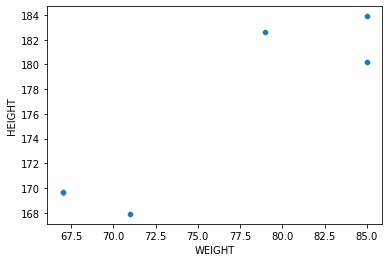

In [28]:
import seaborn as sns
sns.scatterplot(data=train,y="HEIGHT",x="WEIGHT")

<AxesSubplot:xlabel='WEIGHT', ylabel='HEIGHT'>

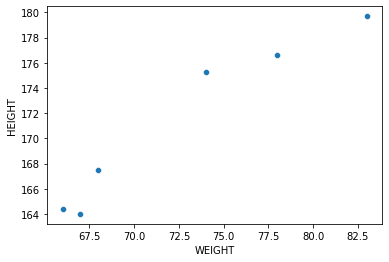

In [29]:
import seaborn as sns
sns.scatterplot(data=test,y="HEIGHT",x="WEIGHT")

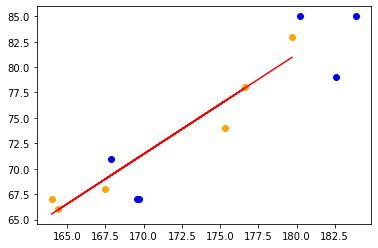

In [27]:
import matplotlib.pyplot as plt
plt.scatter(train.HEIGHT,train.WEIGHT,color="blue")
plt.scatter(test.HEIGHT,test.WEIGHT,color="orange")
plt.plot(test.HEIGHT,pre_test, color="red")
plt.show()
